# <center>Homework 4: Coding</center>
<center>DATA 558, Spring 2021</center>
<center>Author: Apoorv Sharma</center>

In [87]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, LassoCV
from sklearn import preprocessing

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import matplotlib.pyplot as plt
from tqdm import tqdm

## A

Implement the function F(β) in the n = 1, d = 1 case. Implement a soft thresholding function that returns β given x,y,λ. Plot F(β), setting x = 1,y = 1,λ = 0.5, and show visually that the minimum is obtained by your soft thresholding function.

In [88]:
def f_beta(x, y, beta, lambda_):
    return (y - x*beta)**2 + lambda_ * abs(beta)

In [89]:
def get_beta(x, y, lambda_):
    
    factor = x*y
    
    beta = 0
    if factor > lambda_:
        beta = (x*y - lambda_) / (x ** 2)
    elif abs(factor) == 0:
        beta = 0
    elif factor < -1 * lambda_:
        beta = (x*y + lambda_) / (x ** 2)
    
    return beta

In [90]:
x = 1
y = 1
lambda_ = 0.5

In [91]:
betas = np.linspace(-2, 2, 50)
objs = [f_beta(x, y, beta, lambda_) for beta in betas]

Text(0, 0.5, 'Objective')

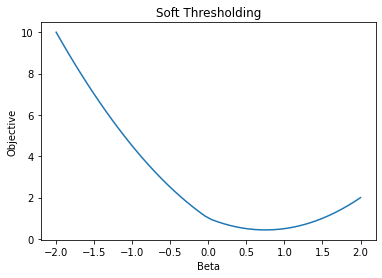

In [92]:
plt.plot(betas, objs)

plt.title(f'Soft Thresholding')
plt.xlabel('Beta')
plt.ylabel('Objective')

## B

Write a function computeobj that computes and returns F(β) for any β, given X, y, and λ. Plot this function by first generating some data

In [93]:
def computeobj(X, y, beta, lambda_):
    N, d = X.shape
    #return 1/(2 * N) * np.linalg.norm(y - X.dot(beta)) ** 2 + lambda_ * np.linalg(beta, ord=1)
    return 1/(2 * N) * np.sum((y - X.dot(beta))**2) + lambda_ * (np.sum(np.abs(beta)))

In [94]:
np.random.seed(123)
X = np.random.normal(size=(10, 2))
beta = np.array([2.0, -5.0])
y = np.dot(X, beta) + np.random.normal(10) 
lambda_ = 3.0

In [95]:
computeobj(X, y, beta, lambda_)

136.29108393464412

In [96]:
def plot_objective(X, y, computeobj, lambda_, init_beta=None, min_beta=None, iterates=None): 
    nb = 100
    brange = np.linspace(-10, 10, nb) 
    b1, b2 = np.meshgrid(brange, brange)
    
    z = np.array([computeobj(X, y, beta, lambda_) for beta in zip(b1.ravel(), b2.ravel())])
    
    levels=np.logspace(-5,4,100)
    
    plt.figure(figsize=(6,6))
    
    plt.hlines(y=0, xmin=-10, xmax=10, color='k')
    plt.vlines(x=0, ymin=-10, ymax=10, color='k')
    
    if min_beta is not None: plt.scatter(min_beta[0], min_beta[1], marker="x", s=100, color='orange', label='after partial min')
    if init_beta is not None: plt.scatter(init_beta[0], init_beta[1], marker="x", s=100, color='black', label='init point')
    if iterates is not None:
        # Arrows.
        for j in range(1, len(iterates)):
            plt.annotate( "",
                xy=iterates[j], xytext=iterates[j - 1],
                arrowprops={"arrowstyle": "->", "lw": 1}, 
                 va="center",
                ha="center",
            )
    
    plt.contour(brange, brange, z.reshape((nb, nb)), levels=levels);
    if min_beta is not None or init_beta is not None:
        plt.legend()
    plt.show()

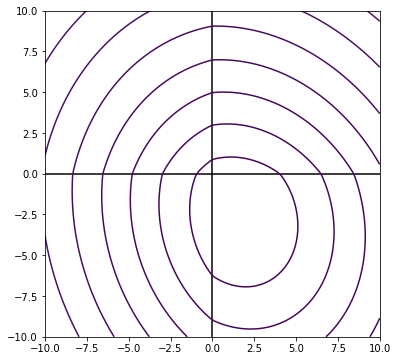

In [97]:
plot_objective(X, y, computeobj, lambda_, min_beta=None, iterates=None)

## C

Write a function partial min that takes X, y, β, λ and an index j, and returns the vector β~ that results from minimizing F(β) along coordinate j, starting at the point β. Using the same X, y, λ as above, evaluate this function from the starting point beta init and on coordinate j = 1. 

Generate the same contour plot as above, this time adding the initial point and the point that results from your partial minimization.

In [98]:
def partial_min(X, y, beta, lambda_, j):
    N, d = X.shape
    
    X_j_minus = np.delete(X, j, 1)
    X_j = X[:, j]
    
    beta_minus_j = np.delete(beta, j)
    
    R_j_minus = y - X_j_minus.dot(beta_minus_j)
    
    thresh_rule = (1/N) * X_j.dot(R_j_minus)
    Z_j = (1/N) * X_j.dot(X_j)
    
    beta_tilda = np.copy(beta)
    if abs(thresh_rule) <= lambda_: 
        beta_tilda[j] = 0
        return beta_tilda
    
    if thresh_rule < -lambda_:
        beta_tilda[j] = (lambda_ + thresh_rule) / Z_j
    else: #thresh_rule >= -lambda_:
        beta_tilda[j] = (-lambda_ + thresh_rule) / Z_j

    
    return beta_tilda

In [99]:
np.random.seed(123)
X = np.random.normal(size=(10, 2))
y = np.dot(X, beta) + np.random.normal(10)
lambda_ = 3.0
beta_init = np.array([5, 5])
j=1

beta_min = partial_min(X, y, beta_init, lambda_, j)
beta_min

array([ 5, -1])

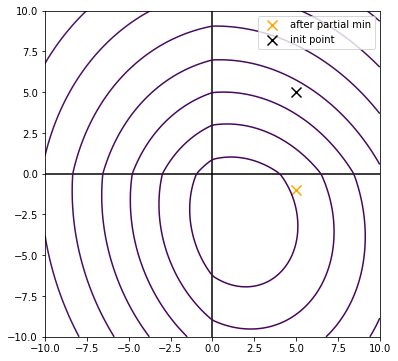

In [100]:
plot_objective(X, y, computeobj, lambda_, init_beta=beta_init, min_beta=beta_min, iterates=None)

## D

In [101]:
file = 'HW4_data.csv'
df = pd.read_csv(file, sep=',', header=0)

In [102]:
df.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,critical_temp
0,84.231574,57.842763,66.164102,36.112184,1.430024,1.138253,122.90607,33.640786,47.428396,53.589094,...,1009.946857,752.280835,937.287219,1.545214,0.812484,810.6,749.048857,294.283693,356.200361,5.0
1,88.944468,57.894262,66.361592,36.124868,1.181795,0.932518,122.90607,37.319570,51.968828,53.669752,...,1011.040571,718.152900,939.406232,1.305967,0.764604,810.6,746.035714,323.811808,354.499974,10.2
2,75.100250,51.579798,61.298642,35.158873,1.456708,1.390133,121.32760,19.623906,39.288902,44.284202,...,998.089172,705.732671,930.382127,1.542128,0.937941,810.6,690.345940,291.828474,346.349554,75.0
3,74.231650,51.480943,60.515221,35.113886,1.453747,1.340115,121.32760,20.650805,39.445875,44.246346,...,1003.200310,771.891022,937.305449,1.552506,0.929772,810.6,694.888235,282.395259,341.811885,53.0
4,119.942725,91.077409,90.003794,73.231604,1.590565,1.551095,191.20060,29.007229,70.961415,55.280514,...,721.865714,701.448928,687.113728,1.733547,1.540374,786.5,192.422857,268.928309,255.944162,90.0


In [103]:
df.isnull().sum(axis=0)

mean_atomic_mass           0
wtd_mean_atomic_mass       0
gmean_atomic_mass          0
wtd_gmean_atomic_mass      0
entropy_atomic_mass        0
wtd_entropy_atomic_mass    0
range_atomic_mass          0
wtd_range_atomic_mass      0
std_atomic_mass            0
wtd_std_atomic_mass        0
mean_fie                   0
wtd_mean_fie               0
gmean_fie                  0
wtd_gmean_fie              0
entropy_fie                0
wtd_entropy_fie            0
range_fie                  0
wtd_range_fie              0
std_fie                    0
wtd_std_fie                0
critical_temp              0
dtype: int64

In [104]:
df.columns

Index(['mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'critical_temp'],
      dtype='object')

In [105]:
X = df[['mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie']]
feature_columns = X.columns

y = df[['critical_temp']]

In [106]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [107]:
# scaler = preprocessing.StandardScaler().fit(y.values.reshape(-1, 1))
# y = scaler.transform(y.values.reshape(-1, 1)).reshape((-1))

y = y - np.mean(y)
y = y.values.reshape(-1, 1).reshape((-1))

In [108]:
N, d = X.shape

## E

In [109]:
alphas = np.logspace(-2,2,31)

In [110]:
model_parms = {'alphas': alphas}

In [111]:
reg = LassoCV(cv=5).set_params(**model_parms).fit(X, y)
lamb_opt_5 = 2 * reg.alpha_

In [112]:
lamb_opt_5

2.0

In [113]:
reg = LassoCV(cv=N).set_params(**model_parms).fit(X, y)
lamb_opt_N = 2 * reg.alpha_

In [114]:
lamb_opt_N

1.4712845089192828

## F

In [115]:
def cycliccoorddescent(X, y, beta_init, lambda_, max_iters=1000):
    N, d = X.shape
    
    beta = np.copy(beta_init)
    iterates = [np.copy(beta_init)]
    
    for i in range(max_iters):
        j = i % d
        
        beta = partial_min(X, y, beta, lambda_, j)
        iterates.append(np.copy(beta))
    
    return iterates

## G

In [116]:
def randcoorddescent(X, y, beta_init, lambda_, max_iters=1000):
    N, d = X.shape
    
    beta = np.copy(beta_init)
    iterates = [np.copy(beta_init)]
    
    for i in range(max_iters):
        j = np.random.randint(d)
        
        beta = partial_min(X, y, beta, lambda_, j)
        iterates.append(np.copy(beta))
    
    return iterates

## H

In [117]:
def plot_lasso_objective(X, y, lambda_):
    beta_init = np.zeros(d)
    
    max_iters = 20000
    iterates_cyclic = cycliccoorddescent(X, y, beta_init, lambda_, max_iters=max_iters) 
    iterates_rand = randcoorddescent(X, y, beta_init, lambda_, max_iters=max_iters) 

    obj_cyclic = [computeobj(X, y, beta, lambda_) for beta in iterates_cyclic]
    obj_rand = [computeobj(X, y, beta, lambda_) for beta in iterates_rand]
    
    plt.figure(figsize=(10,5))

    plt.plot(obj_cyclic, label='cycliccoorddescent')
    plt.plot(obj_rand, label='randcoorddescent')

    plt.legend()

    plt.title(f'Lasso Objective Values (lambda={lambda_:.2f})')
    plt.xlabel('Iterations')
    plt.ylabel('Lasso Objective Values')
    
    return iterates_cyclic, iterates_rand, obj_cyclic, obj_rand

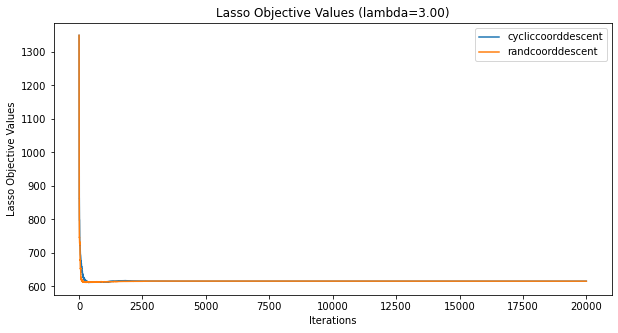

In [118]:
_ = plot_lasso_objective(X, y, lambda_)

## I

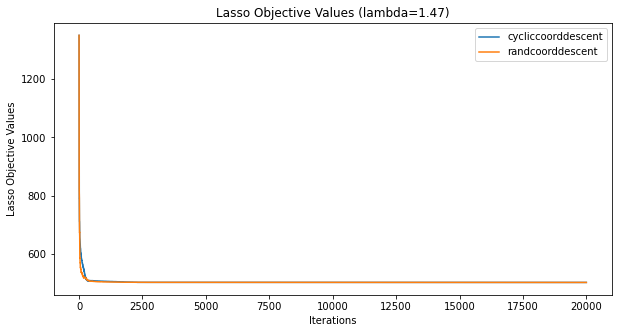

In [119]:
iterates_cyclic_N, iterates_rand_N, obj_cyclic_N, obj_rand_N = plot_lasso_objective(X, y, lamb_opt_N)

## J

In [120]:
clf = Lasso(alpha=lamb_opt_N, max_iter=20000)
clf.fit(X, y)

Lasso(alpha=1.4712845089192828, max_iter=20000)

In [121]:
clf.coef_.reshape(5, 4) #reshape for printing

array([[ -0.        ,  -0.        , -15.26501854,   0.        ],
       [ -0.        ,   0.        ,   4.89480211,  -8.71140324],
       [ 10.3435152 ,   0.        ,   0.        ,  -0.        ],
       [  0.        , -19.98412759,   0.        ,   0.        ],
       [  0.30707713,  -0.02366533,  -0.        ,  -0.        ]])

In [122]:
iterates_cyclic_N[-1].reshape(5, 4) #reshape for printing

array([[  0.        ,   0.        , -15.25428712,   0.        ],
       [  0.        ,   0.        ,   4.86692171,  -8.70850432],
       [ 10.35991051,   0.        ,   0.        ,   0.        ],
       [  0.        , -19.89809025,   0.        ,   0.        ],
       [  0.30923854,  -0.11226615,   0.        ,   0.        ]])

In [123]:
iterates_rand_N[-1].reshape(5, 4) #reshape for printing

array([[  0.        ,   0.        , -15.25428228,   0.        ],
       [  0.        ,   0.        ,   4.86691829,  -8.70850174],
       [ 10.35990946,   0.        ,   0.        ,   0.        ],
       [  0.        , -19.89805149,   0.        ,   0.        ],
       [  0.30923854,  -0.11230473,   0.        ,   0.        ]])

## K

In [124]:
selected_features = list(feature_columns[np.nonzero(iterates_rand_N[-1])[0]])
selected_features

['gmean_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'wtd_gmean_fie',
 'range_fie',
 'wtd_range_fie']

In [125]:
print(f'# Possible features: {len(feature_columns)}\n# Selected Features: {len(selected_features)}')
print(f'Sparsity: {(1 - len(selected_features) / (len(feature_columns))) * 100:.0f}%')

# Possible features: 20
# Selected Features: 7
Sparsity: 65%


Out of the 20 possible features we could have used, it can be seen that we only use 7 features to predict the desired output variable.

## L

In [130]:
def compute_lasso_reg_path(X, y, lam_range):
    coefs = []
    for lambda_ in lam_range:
        beta_init = np.zeros(d)
        max_iters = 20000
        
#         beta_min_rand = randcoorddescent(X, y, beta_init, lambda_, max_iters=max_iters)[-1]
    
        beta_min_rand = Lasso(alpha=lambda_, max_iter=20000).fit(X, y).coef_
        
        coefs += [beta_min_rand]
    
    return coefs

In [131]:
def plot_reg_path(coefs, lam_range, feature_columns=[]):
    plt.figure(figsize=(27, 12))
    
    d = coefs.shape[1]
    for j in range(d):
        log_decreasing_lams = np.log(lam_range)[::-1]
        if feature_columns is not None:
            label = f'{feature_columns[j]}'
        else:
            label = f'Component {j}'
            
        plt.plot(np.log(lam_range), coefs[:,j], label=label)
    
    plt.title(f'Regularization Path')
    plt.gca().invert_xaxis() # plot w/ lambda decreasing from left to right
    plt.xlabel(r'$\log \lambda$')
    plt.ylabel('Lasso parameter')
    plt.legend(frameon=False, loc='upper left', fontsize=10)
    plt.show()

In [132]:
lambda_range = np.logspace(-2,2,31)
path_iterates = compute_lasso_reg_path(X, y, lambda_range)

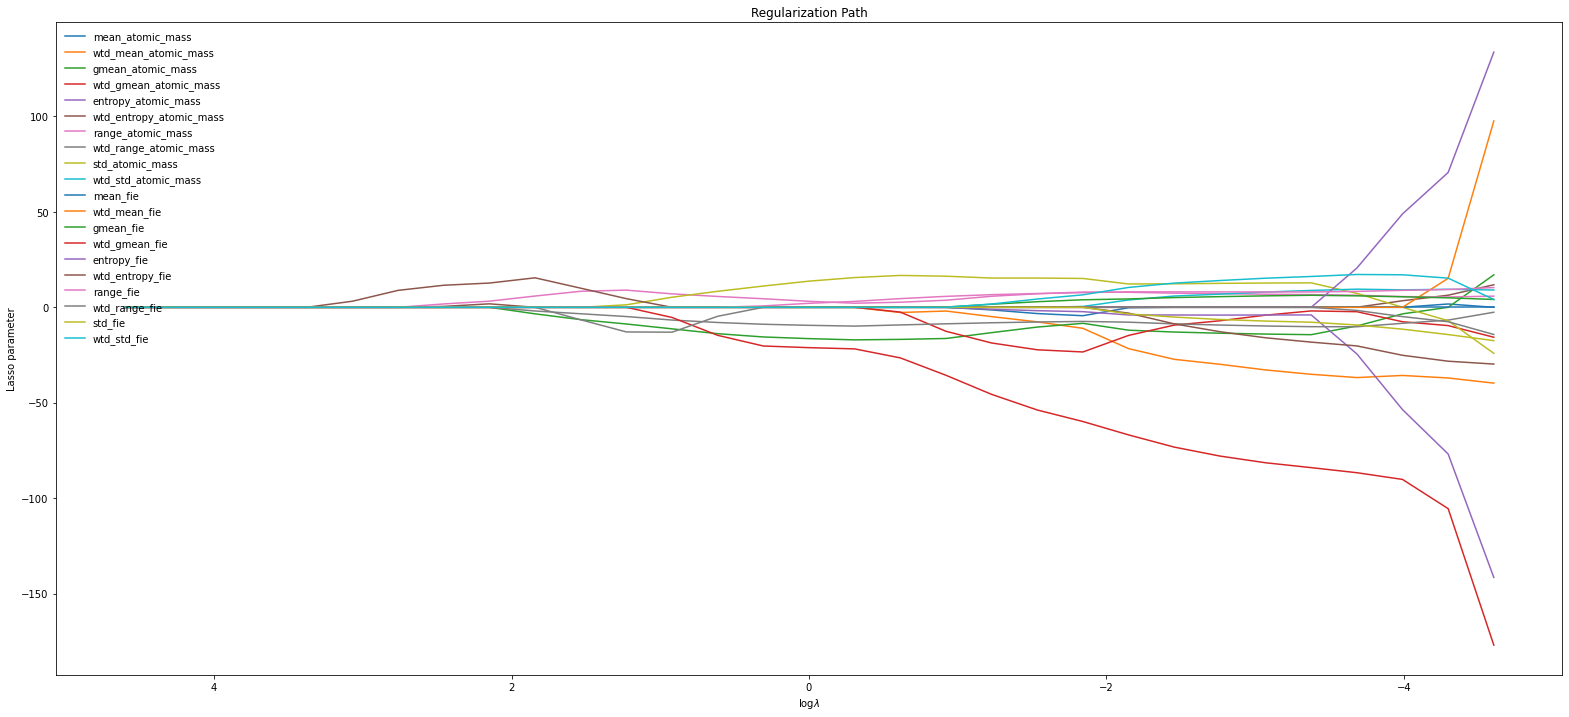

In [133]:
plot_reg_path(np.array(path_iterates), lambda_range, feature_columns)

As the lambda value decreases, it can be observed that the magnitude of the lasso parameters starts to increase. 